In [185]:
import pandas as pd 
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from collections import Counter

In [186]:
df = pd.read_csv("./timetable.csv", index_col=[0]) 
df.head(6)

DeparturePort     DepartureTime ArrivalPort       ArrivalTime  \
0              GUSTAVIA  2019-12-05 19:59    GUSTAVIA  2019-12-06 09:56   
1              GUSTAVIA  2019-12-06 12:52    GUSTAVIA  2019-12-07 10:06   
2         FREEPORT (TX)  2019-12-05 20:10     HOUSTON  2019-12-06 07:59   
3                 KAWAU  2019-12-06 20:05       KAWAU  2019-12-07 03:08   
4                 KAWAU  2019-12-07 22:17       KAWAU  2019-12-08 00:26   
5  CONCEPTION D URUGUAY  2019-12-05 19:53     ROSARIO  2019-12-08 02:44   

               Vessel VesselType  
0        HIRUNDO [BL]      cargo  
1        HIRUNDO [BL]      cargo  
2    DEL WILKINS [US]        tug  
3         KRABAT [NZ]      yacht  
4         KRABAT [NZ]      yacht  
5  ALP CATAMARCA [AR]        tug

## Global Overview - undirected vs. directed Graph

In [190]:
#define nodes
arrival_nodes = df.ArrivalPort.tolist()
departure_nodes = df.DeparturePort.tolist()

nodes = set(np.concatenate((arrival_nodes, departure_nodes)))

In [191]:
#define edges
edges = []
for i in df.index:
    edge = (df['DeparturePort'][i], df['ArrivalPort'][i])
    edges.append(edge)

### Undirected Graph

In [192]:
#create undirected Graph
graph_undirected = nx.Graph()

graph_undirected.add_nodes_from(nodes)
graph_undirected.add_edges_from(edges)

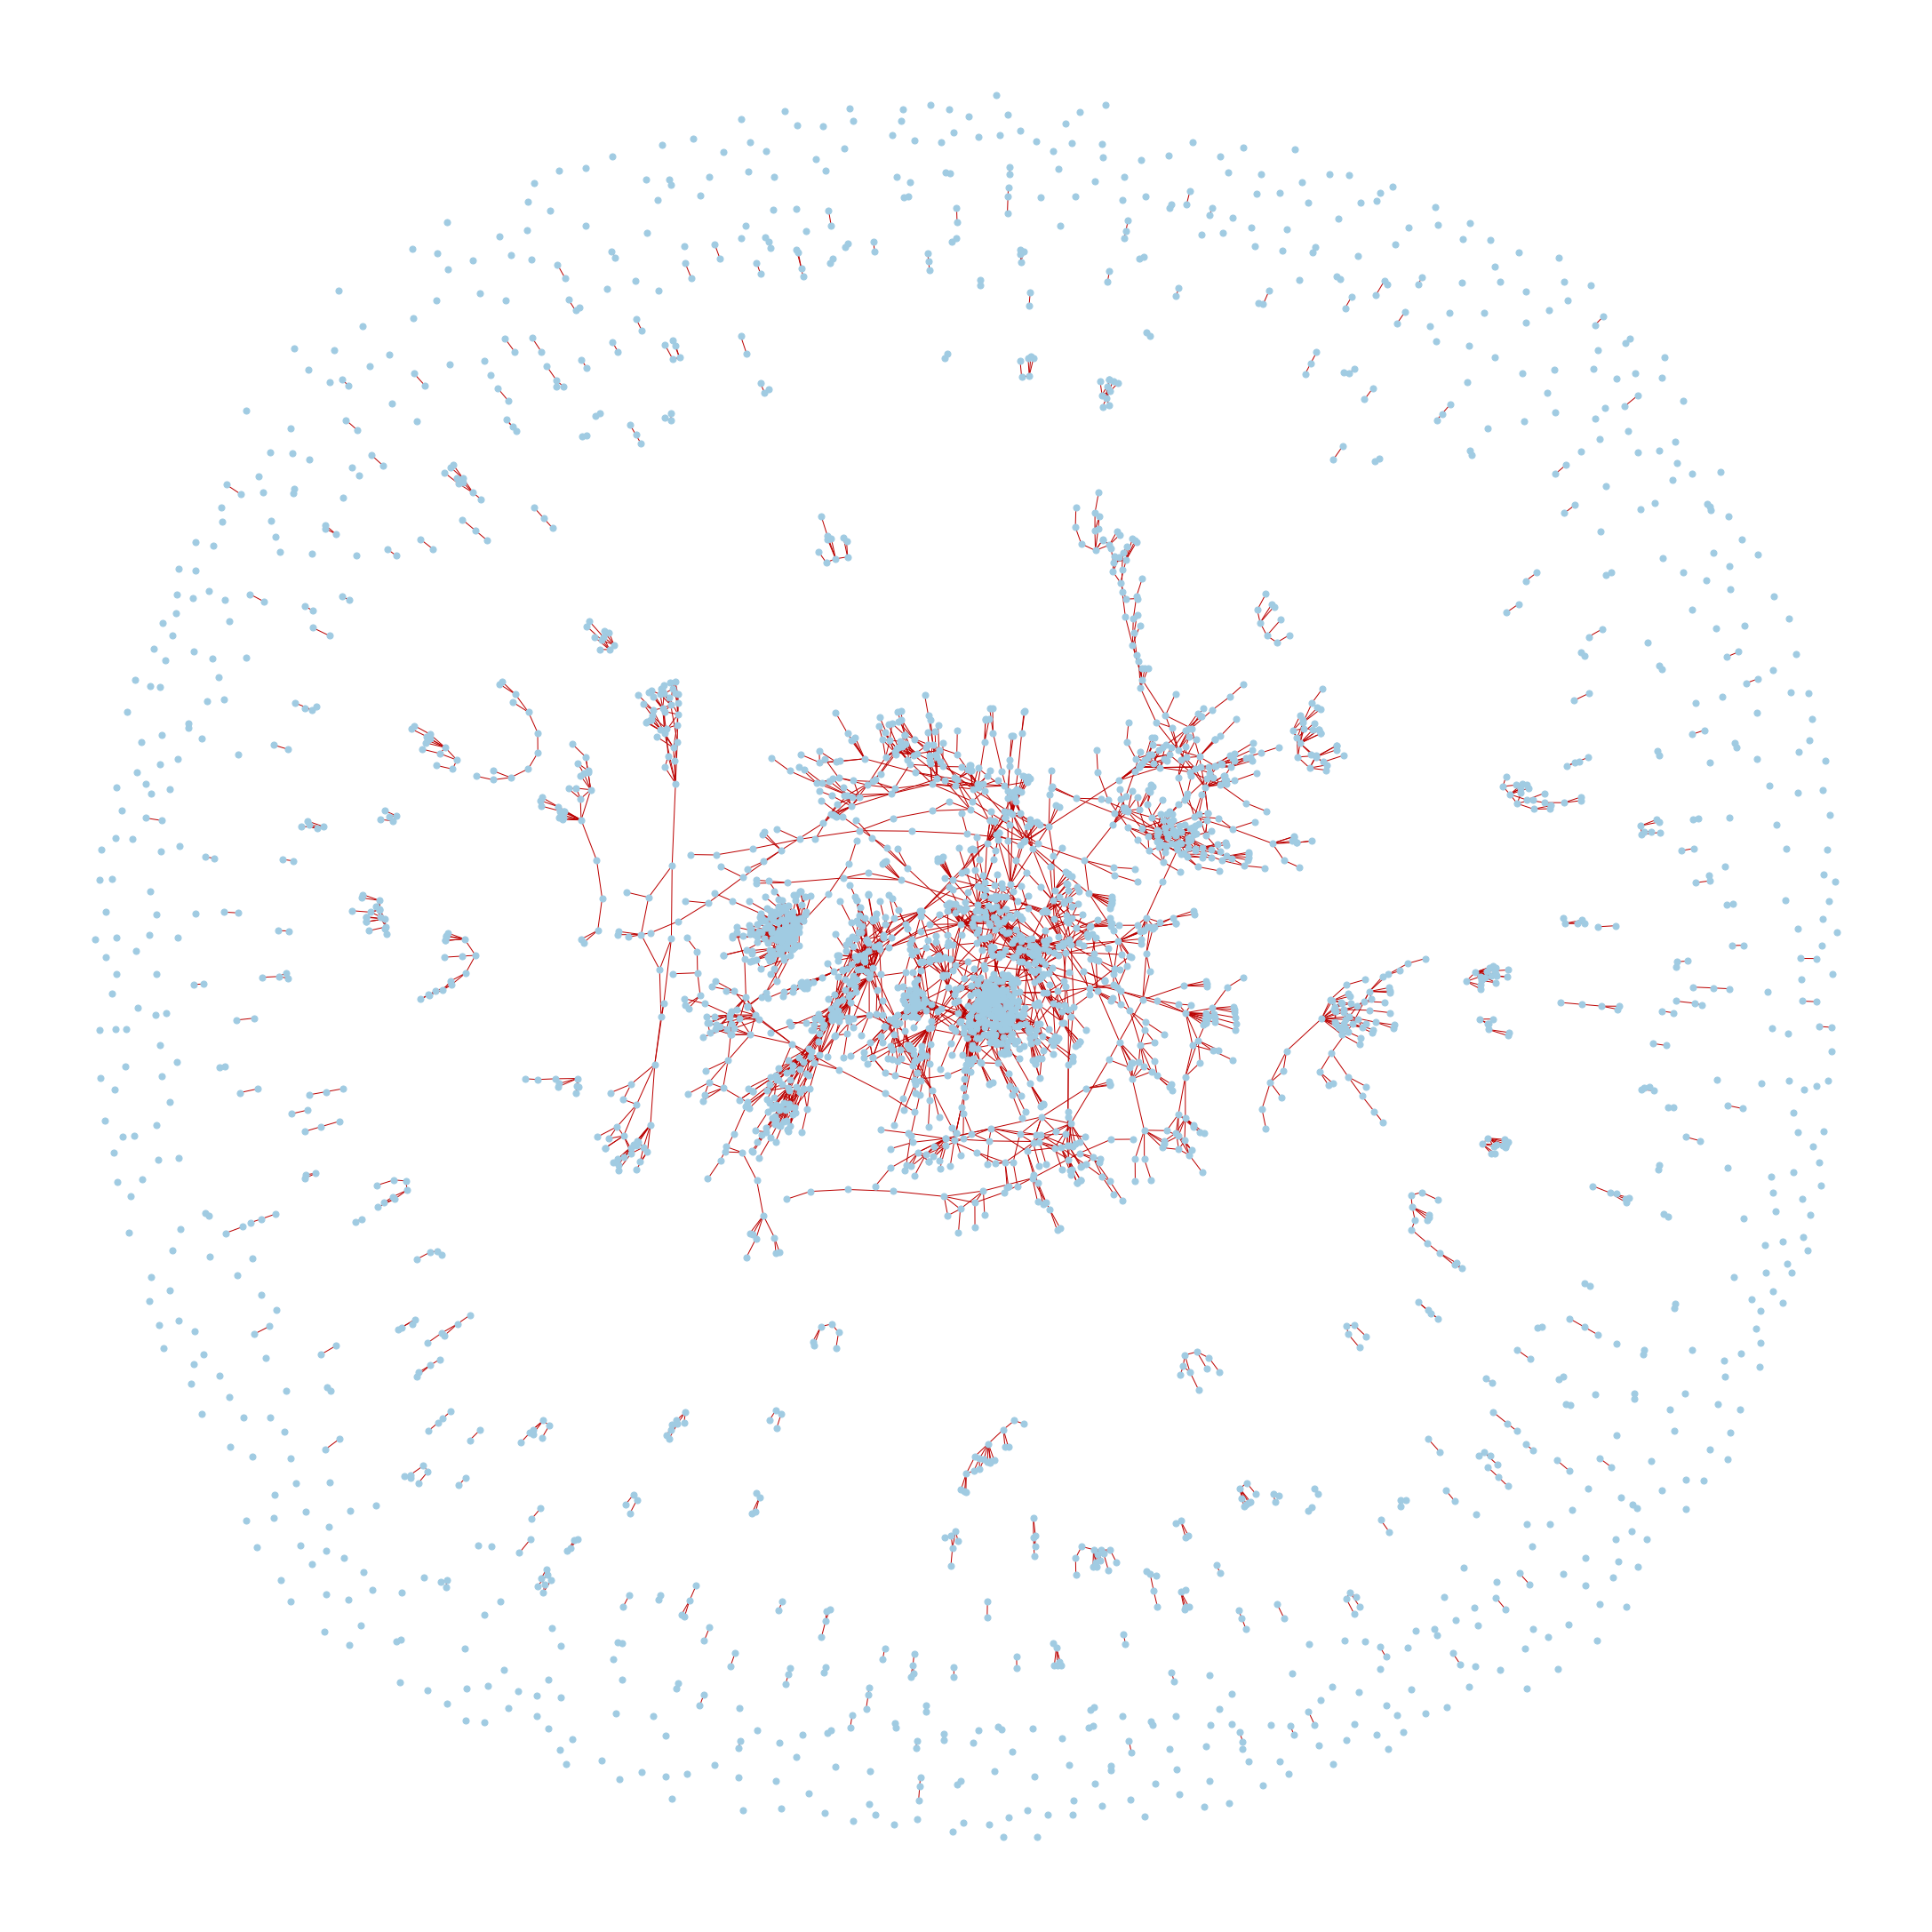

In [198]:
#plot whole network
pos=nx.spring_layout(graph_undirected)
plt.figure(1, figsize=(45,45))
nx.draw(graph_undirected,pos,node_color='#A0CBE2',edge_color='#BB0000',width=1,node_size=50,font_size=5,with_labels=False)
plt.show()

### Directed Graph

In [201]:
#create directed graph with weights
graph_directed = nx.DiGraph((x, y, {'weight': v}) for (x,y), v in Counter(edges).items())
graph.add_nodes_from(nodes)
graph.add_edges_from(edges)

#graph.edges(data = True)

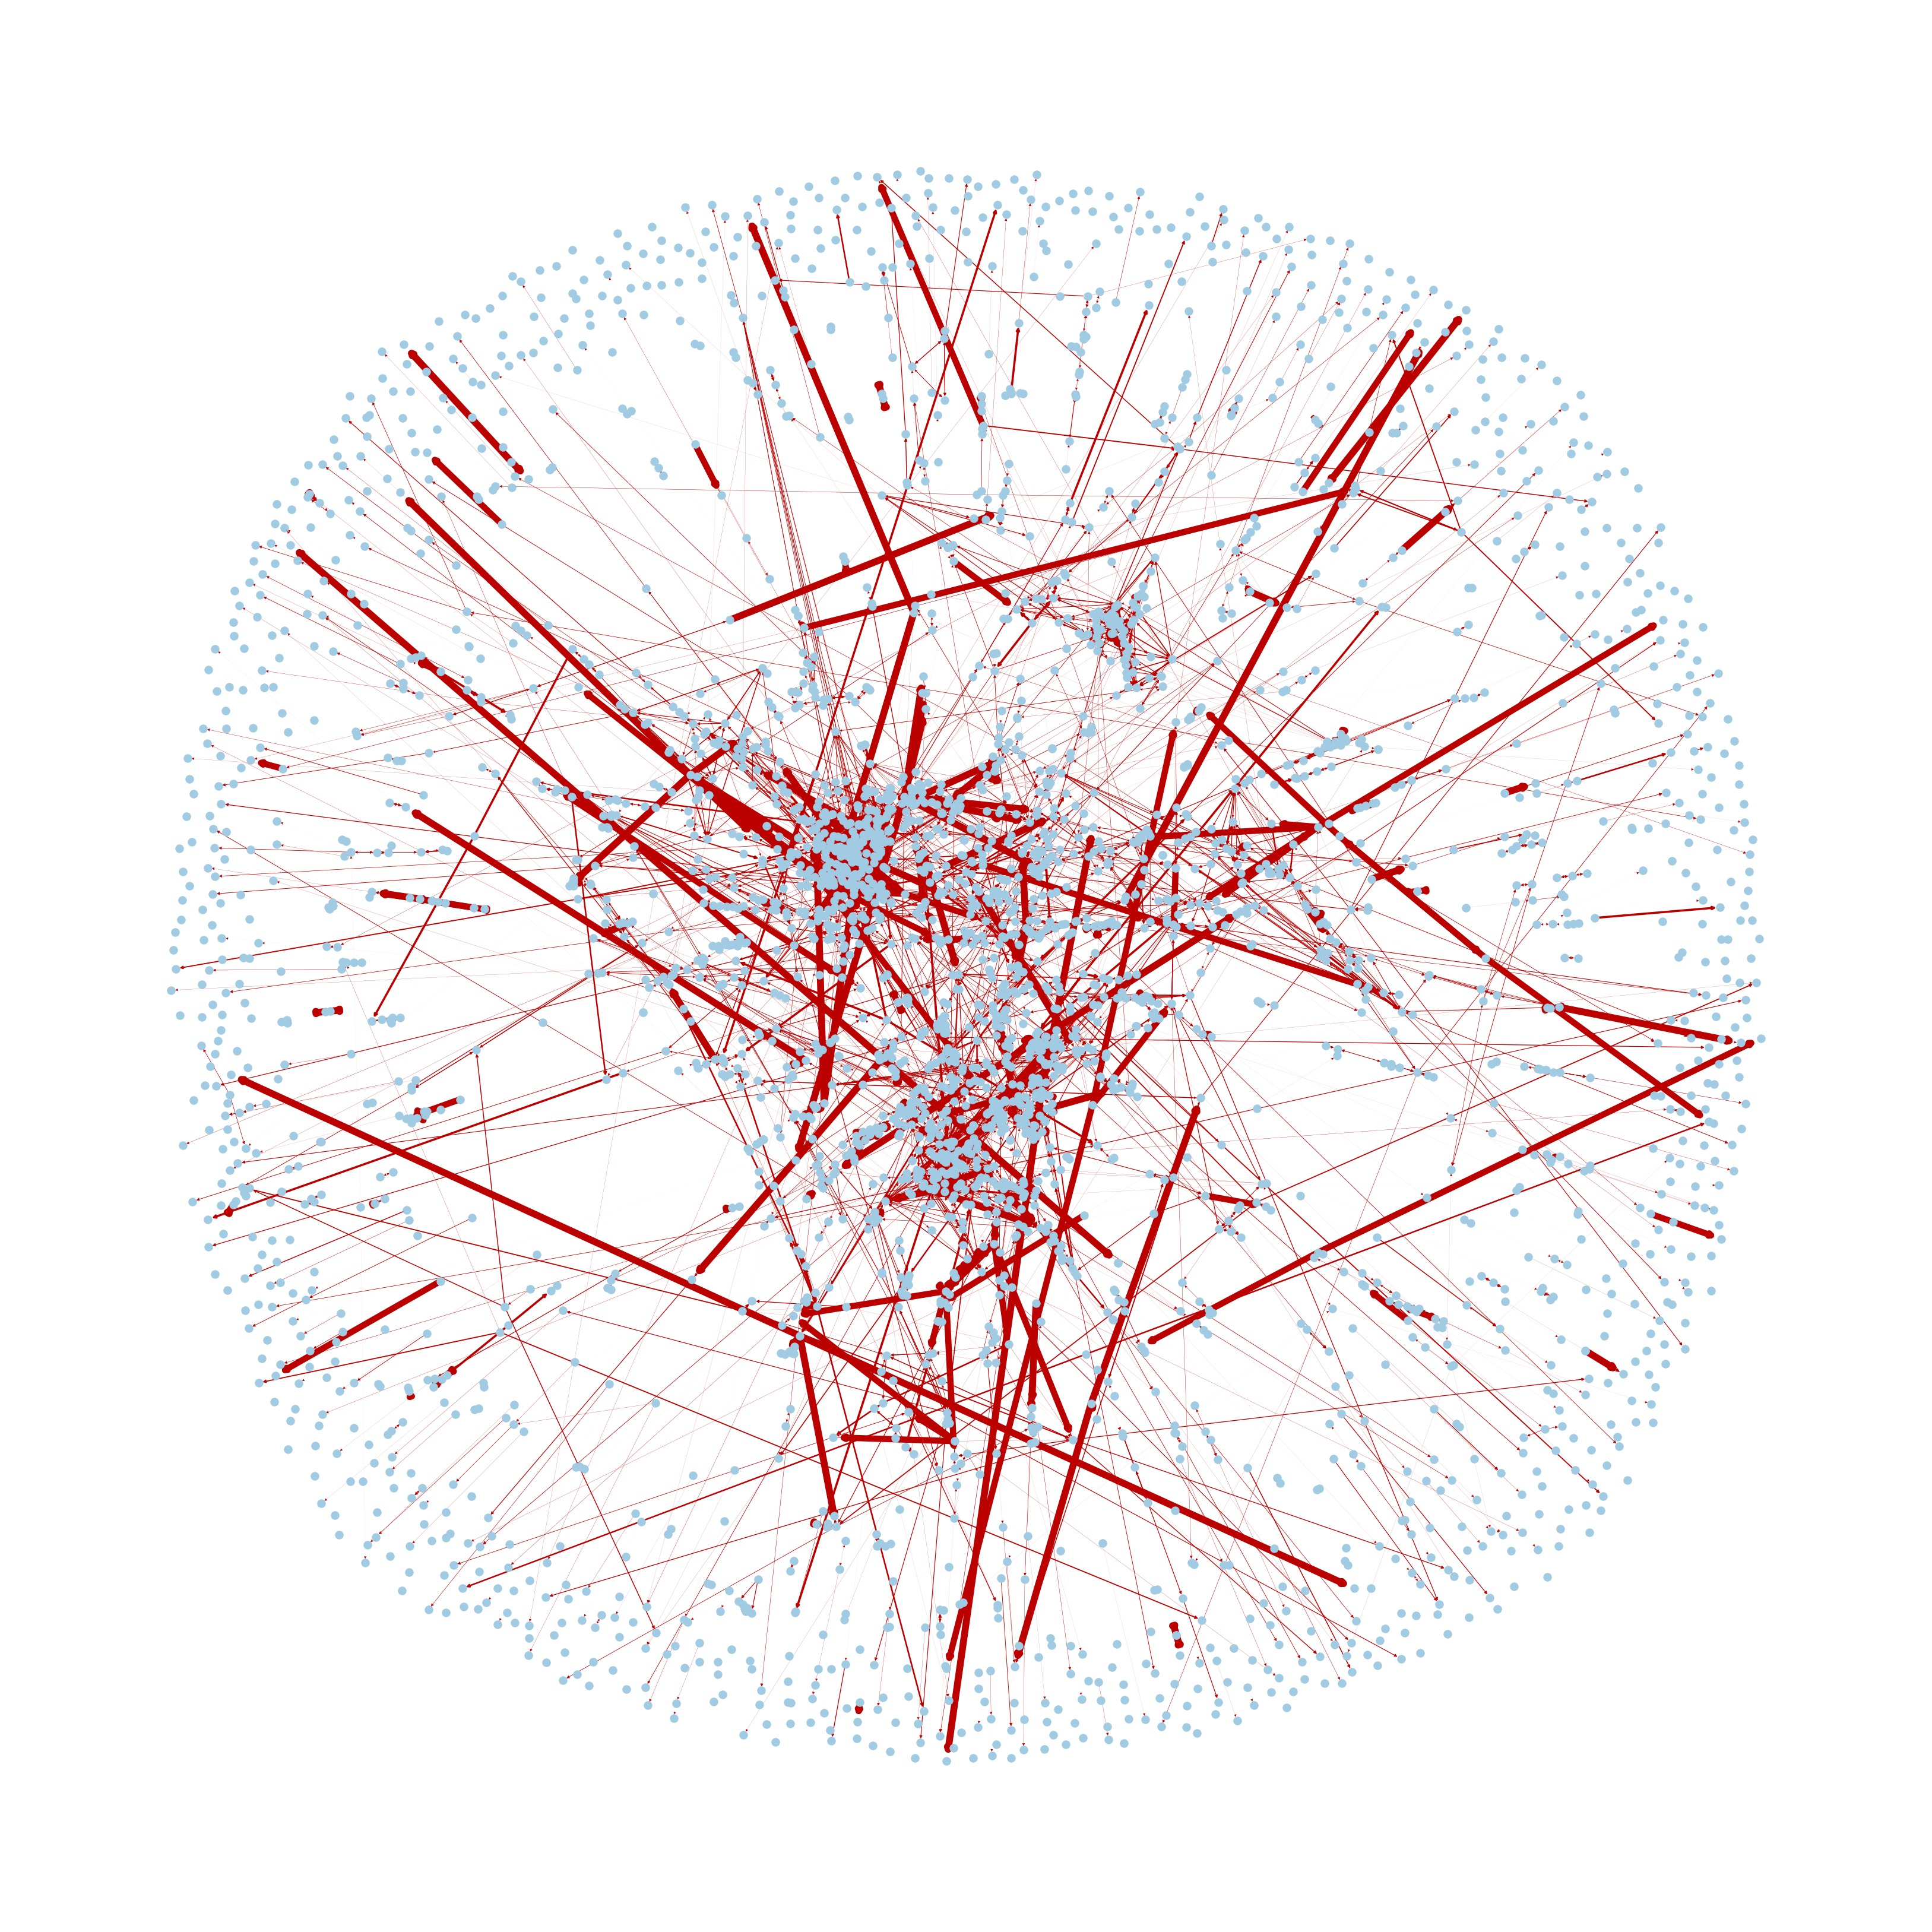

In [202]:
#plot whole network
pos=nx.spring_layout(graph_directed)
plt.figure(1, figsize=(45,45))
weights = [graph_directed[u][v]['weight']*0.005 for u,v in edges]
nx.draw(graph_directed,pos,node_color='#A0CBE2',edge_color='#BB0000',width=weights,node_size=180,font_size=5,with_labels=False)
plt.savefig("graph_orig.pdf")
plt.show() 

## Degree: Ports with most degree

In [ ]:
degree = graph_directed.degree()
to_keep = [n for (n, deg) in degree if deg > 10]
graph_filtered_degree = graph_directed.subgraph(to_keep)

pos=nx.spring_layout(graph_filtered_degree, k=0.6)
plt.figure(1, figsize=(45,45))
nx.draw(graph_filtered_degree,pos,node_color='#A0CBE2',edge_color='#BB0000',width=1,node_size=5000,font_size=11,with_labels=True)
plt.show()

In [125]:
#Degree centrality - whole network
all_degree_centrality = nx.degree_centrality(graph)

centrality_dict = {k: v for k, v in sorted(all_degree_centrality.items(), key=lambda item: item[1])}

print("Highest Degree Centrality:")
print()
for x in list(reversed(list(centrality_dict)))[0:10]:
    print(x, round(centrality_dict.get(x) * (len(all_degree_centrality) - 1)))

Highest Degree Centrality:

NIEUWEGEIN 91
DORDRECHT 84
AMSTERDAM 83
MAASVLAKTE - ROTTERDAM 80
ROTTERDAM WAALHAVEN 76
HANSWEERT 75
BOTLEK - ROTTERDAM 73
ROTTERDAM 72
OSAKA 70
DUISBURG 63


In [162]:
#Hafen mit meistem Verkehr
weighted_degrees = []

for n in nodes:
    weighted_degree = 0
    for e in graph.edges(n, data = True):
        weighted_degree += e[2].get('weight')
    
    weighted_degrees.append((n,weighted_degree))

weighted_degrees


for x in list(reversed(list(sorted(weighted_degrees, key=lambda x: x[1]))))[0:15]:
    print(x[0], ':', x[1])

SINGAPORE : 2567
HONG KONG : 2099
SYDNEY : 1251
AMSTERDAM : 959
ROTTERDAM CENTRUM : 875
XIAMEN : 855
ROTTERDAM : 781
MAASVLAKTE - ROTTERDAM : 780
ROTTERDAM WAALHAVEN : 759
DORDRECHT : 661
PORTSMOUTH : 631
BRUNSBUETTEL : 619
BOTLEK - ROTTERDAM : 557
FUJAIRAH : 522
SAN FRANCISCO : 493


In [164]:
#meist befahrene Strecke
weighted_edges = []

for e in graph.edges(data = True):
    weighted_edges.append((e[0],e[1],e[2].get('weight')))

for x in list(reversed(list(sorted(weighted_edges, key=lambda x: x[2]))))[0:15]:
    print(x)

('SINGAPORE', 'SINGAPORE', 2332)
('HONG KONG', 'HONG KONG', 2099)
('XIAMEN', 'XIAMEN', 723)
('SYDNEY', 'SYDNEY', 709)
('FUJAIRAH', 'FUJAIRAH', 519)
('ROTTERDAM CENTRUM', 'ROTTERDAM CENTRUM', 499)
('BRUNSBUETTEL', 'BRUNSBUETTEL', 410)
('GELKENES', 'SCHOONHOVEN', 393)
('AMSTERDAM', 'AMSTERDAM', 376)
('MACAU', 'MACAU', 371)
('BUSAN', 'BUSAN', 366)
('GOSPORT', 'PORTSMOUTH', 358)
('PORTSMOUTH', 'GOSPORT', 355)
('ALGECIRAS', 'ALGECIRAS', 351)
('ROTTERDAM', 'MAASVLAKTE - ROTTERDAM', 342)


## Hafen ohne self loops (externer Hafenverkehr)

In [167]:
#define edges withou self-loops
edges_no_self_loop = []
for i in df.index:
    dep = df['DeparturePort'][i]
    arr = df['ArrivalPort'][i]
    
    if (dep != arr):
        edges_no_self_loop.append((dep, arr))

In [177]:
#Create graph
graph_no_loops = nx.DiGraph((x, y, {'weight': v}) for (x,y), v in Counter(edges_no_self_loop).items())

graph_no_loops.add_nodes_from(nodes)
graph_no_loops.add_edges_from(edges_no_self_loop)

In [178]:
#Degree centrality
degree_centrality_no_selfloop = nx.degree_centrality(graph_no_loops)
centrality_dict_no_selfloop = {k: v for k, v in sorted(degree_centrality_no_selfloop.items(), key=lambda item: item[1])}

In [179]:
count = sum(map(lambda x : centrality_dict_no_selfloop.get(x) == 0.0, centrality_dict_no_selfloop))
print('Numbers of self-looping ports:', count)
print('Percentage self-looping ports:', 100/len(centrality_dict_no_selfloop)*count)

Numbers of self-looping ports: 590
Percentage self-looping ports: 16.54978962131837


In [182]:
#Hafen mit meistem Verkehr aus externen Häfen (ohne self loops)
weighted_degrees = []

for n in nodes:
    weighted_degree = 0
    for e in graph_no_loops.edges(n, data = True):
        if e is not None:
            weighted_degree += e[2].get('weight')
    
    weighted_degrees.append((n,weighted_degree))


for x in list(reversed(list(sorted(weighted_degrees, key=lambda x: x[1]))))[0:15]:
    print(x[0], ':', x[1])

ROTTERDAM WAALHAVEN : 706
ROTTERDAM : 616
AMSTERDAM : 583
PORTSMOUTH : 563
SYDNEY : 542
MAASVLAKTE - ROTTERDAM : 539
BOTLEK - ROTTERDAM : 499
DELFSHAVEN : 430
DORDRECHT : 406
GELKENES : 404
ROTTERDAM CENTRUM : 376
GOSPORT : 366
ZAANDAM : 360
PAPENDRECHT : 341
VILLA SAN GIOVANNI : 324


## English Channel - Ärmelkanal

In [107]:
#https://en.wikipedia.org/wiki/Category:Ports_and_harbours_of_the_English_Channel
english_channel_ports = ['OUISTREHAM', 'BLOSCON', 'CORNWALL','LONGSTONE','MILLBAY','OSTEND','GRANVILLE''DARTMOUTH','DEVON','DIEPPE','BARFLEUR','CORNWALL','FECAMP','FOLKESTONE','FOWEY','BARNEVILLE','BARTERET','CANCALE', 'CHANNEL PORTS', 'CHERBOURG', 'DARTMOUTH', 'ROSCOFF', 'TEIGNMOUTH', 'DOVER', 'CAEN', 'FALMOUTH', 'PORTSMOUTH ANCH', 'PORTLAND UK', 'LE HAVRE', 'SOUTHAMPTON', 'PORTSMOUTH']


counter = 0

for p in centrality_dict_no_selfloop.keys():
    for e in english_channel_ports:
        if e == p:
            counter = counter+1
            print(p, round(centrality_dict_no_selfloop.get(p) * (len(centrality_dict_no_selfloop) - 1)))

ROSCOFF 0
TEIGNMOUTH 0
DOVER 0
FECAMP 1
CAEN 1
CHERBOURG 1
FALMOUTH 1
PORTSMOUTH ANCH 3
PORTLAND UK 3
OUISTREHAM 3
LE HAVRE 7
SOUTHAMPTON 8
PORTSMOUTH 10


In [108]:
print('Ports in english channel without traffic:', len(english_channel_ports) - counter)
print('PORTSMOUTH (NH) != PORTSMOUTH ANCH != PORTSMOUTH')

Ports in english channel without traffic: 17
PORTSMOUTH (NH) != PORTSMOUTH ANCH != PORTSMOUTH


In [ ]:
#TODO: Ärmelkanal ports visualisieren

## Schlüssel-Häfen (Betw.)

## Bridges

## Cluster & Cliquen: https://networkx.github.io/documentation/stable/reference/algorithms/approximation.html?highlight=cluster#module-networkx.algorithms.approximation.clustering_coefficient